## DIMENSIONAL REDUCTION

In [1]:
import pandas as pd
import xlrd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
main_path = '../../overfitting/setTraining/'
train = np.load(main_path+'train.npy')
test = np.load(main_path+'test.npy')
y_train = np.load(main_path+'y_train.npy')
y_test = np.load(main_path+'y_test.npy')
print('shapes: train = {}, y_train = {}, test = {}, y_teste = {}'.format(train.shape,y_train.shape,test.shape,y_test.shape))

shapes: train = (17389, 66), y_train = (17389, 5), test = (8566, 66), y_teste = (8566, 5)


In [11]:
## missing values more than 10%
df = pd.DataFrame(train)
variables = df.columns
variable = [ ]
for i in range(0,66):
    if a[i]<=10:   #setting the threshold as 10%
        variable.append(variables[i])
print(len(variable))

66


In [15]:
#Low Variance Filter
numeric = df
var = numeric.var()
numeric = numeric.columns
variable = [ ]
for i in range(0,len(var)-1):
    if var[i]>=10:   #setting the threshold as 10%
       variable.append(numeric[i+1])
print(variable)
print(len(variable))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 47, 48, 49, 50, 53, 54, 56, 57, 59, 61, 62, 63, 64, 65]
53


In [16]:
#High Correlation filter
# need to show the variables with high correlation
df.corr()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,1.000000,-0.925414,-0.791502,-0.782613,-0.846567,-0.841487,-0.489043,-0.485719,-0.465737,-0.469753,...,-0.022215,NaN,0.228240,0.063878,-0.427487,-0.681295,-0.739484,0.196306,0.015898,0.027053
1,-0.925414,1.000000,0.701460,0.692790,0.841945,0.843891,0.230081,0.227831,0.177440,0.175356,...,0.004846,NaN,-0.057636,-0.092414,0.162775,0.574568,0.638601,-0.041005,-0.018517,-0.058490
2,-0.791502,0.701460,1.000000,0.993893,0.861096,0.852607,0.205627,0.208837,0.318182,0.325214,...,0.421404,NaN,0.080129,-0.011853,0.154620,0.933469,0.977843,0.063223,-0.012872,-0.483854
3,-0.782613,0.692790,0.993893,1.000000,0.858007,0.851179,0.197262,0.198780,0.308547,0.315094,...,0.433237,NaN,0.068580,-0.008348,0.155138,0.930188,0.972616,0.052344,-0.013870,-0.484275
4,-0.846567,0.841945,0.861096,0.858007,1.000000,0.998282,0.167239,0.167565,0.128557,0.133252,...,0.181817,NaN,-0.134038,0.009993,0.144820,0.697208,0.778891,-0.084026,-0.033451,-0.142764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,-0.681295,0.574568,0.933469,0.930188,0.697208,0.687961,0.186838,0.193070,0.348742,0.358794,...,0.486634,NaN,0.195870,-0.031676,0.097982,1.000000,0.986395,0.154839,-0.014273,-0.560243
62,-0.739484,0.638601,0.977843,0.972616,0.778891,0.770135,0.199920,0.205266,0.343504,0.352084,...,0.463510,NaN,0.151950,-0.023553,0.123958,0.986395,1.000000,0.120160,-0.009901,-0.535465
63,0.196306,-0.041005,0.063223,0.052344,-0.084026,-0.087396,-0.538698,-0.532717,-0.412633,-0.419551,...,0.309473,NaN,0.774886,0.135852,-0.610300,0.154839,0.120160,1.000000,0.007828,-0.503632
64,0.015898,-0.018517,-0.012872,-0.013870,-0.033451,-0.031109,-0.000233,0.000124,0.009364,0.007443,...,-0.021237,NaN,0.019916,-0.009779,-0.003554,-0.014273,-0.009901,0.007828,1.000000,-0.098133


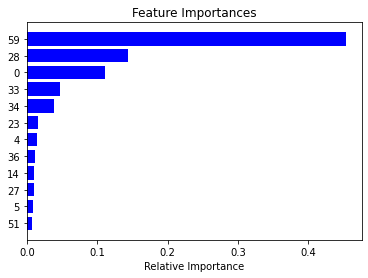

In [20]:
# applying Random Forest to reduction
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=10)
df=pd.get_dummies(df)
model.fit(df,y_train)

features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-12:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()